# Rent the Runway Data Exploration

## Data Overview

For this project, I will be analyzing data from Rent the Runway. Rent the Runway is a clothing rental service that allows women to rent designer items at a fraction of their cost. Rent the Runway provides two types of plans: Rent the Runway Reserve, which allows women to rent items for a one-time special occastion, and Rent the Runway Unlimited, which allows women to rent unlimited pieces on rotation. 

This dataset includes information from 192,544 reviews of items on Rent the Runway. It includes information on the customer's age, body type, bust size, height, and weight. Information about the category of item, the size of item rented, and what purpose the item was rented for are included as well. Finally, customer feedback about the item is included. There is information on the customer rating, customer review summary and full text, feedback on whether the item fit/was too small/was too large, and the date that the customer reviewed the item. 

When analyzing this data, we will assume that customers who have reviewed items are representative of RTR customers as a whole.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_json('renttherunway_final_data.json', lines = True)
df

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
0,28.0,hourglass,34d,romper,fit,"5' 8""",2260466,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs
1,36.0,straight & narrow,34b,gown,fit,"5' 6""",153475,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs
2,116.0,NaN,NaN,sheath,fit,"5' 4""",1063761,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN
3,34.0,pear,34c,dress,fit,"5' 5""",126335,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135lbs
4,27.0,athletic,34b,gown,fit,"5' 9""",616682,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145lbs
5,45.0,athletic,32b,dress,fit,"5' 8""",364092,8.0,date,"April 30, 2016",Traditional with a touch a sass,Didn't actually wear it. It fit perfectly. The...,8,734848,138lbs
6,27.0,hourglass,34c,dress,fit,"5' 3""",568429,10.0,everyday,"December 7, 2017",LITERALLY THE CUTEST DRESS EVER,This dress is so sweet. I loved the print. The...,4,336066,112lbs
7,65.0,full bust,34d+,dress,fit,"5' 3""",130259,10.0,formal affair,"January 1, 2013","Great dress, beautifully made. I received lot...",Fit was great. Maybe a little tight under the ...,8,86661,118lbs
8,27.0,full bust,36d,gown,fit,"5' 6""",1729232,10.0,formal affair,"June 27, 2016",Great for black tie event!,I was nervous of it looking cheap when it arri...,21,166228,NaN
9,33.0,petite,32b,gown,fit,"5' 3""",1729232,10.0,formal affair,"October 17, 2016",This dress was everything! It was perfect for ...,The dress was very flattering and fit perfectl...,1,154309,114lbs


1. What are some characteristics of the typical Rent the Runway user?

The first thing that I wanted to look at was who the typical Rent the Runway user is. The first thing that I looked at was the typical age of the RTR customer.

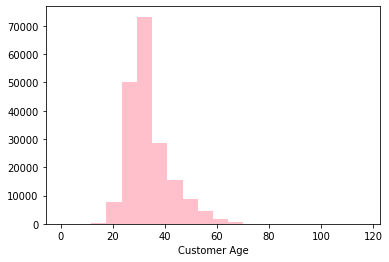

Mean Customer Age:  33.871017412727575


In [36]:
plt.hist(df['age'], bins=20, color = 'pink')
plt.xlabel('Customer Age')
plt.show()
print('Mean Customer Age: ', np.mean(df['age']))

This chart shows that the majority of products were rented by customers in their late-twenties to early-thirties. This data does not represent individual customers, but rather individual product reviews; therefore, customers who rented more items are weighted more heavily in this chart. The mean customer age is about 34.

Next, I looked at the most common body types among RTR customers. Again, this data represents individual product reviews rather than individual users, so users that rent more products will be weighted more heavily in the chart.

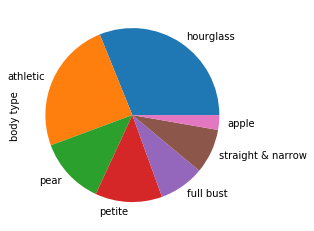

In [101]:
df['body type'].value_counts().plot(kind='pie')
plt.show()

This chart shows that about a third of users describe their bodies as "hourglass" shaped, and about a quarter of users describe their bodies as "athletic". Only a small portion of users describe themselves as "apple" shaped.

Next, I was curious about how many items RTR users are renting and reviewing. First, I looked at the number of items that the top 25 users rented.

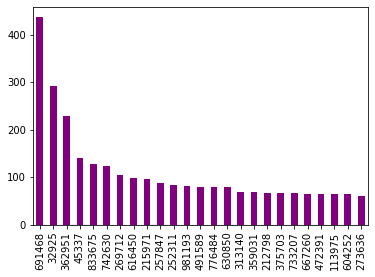

In [45]:
df.user_id.value_counts().head(25).plot(kind='bar', color = 'purple')

This chart shows that the top user has rented well over 400 items, more than 100 items greater than the second most-frequent user. There is a sharp drop in items rented after the top three users, and the rest of the top 35 users rented around 100 items.

Next, I wanted to look at how many users only used RTR to rent a single item.

In [76]:
 user_counts = df['user_id'].value_counts().to_frame()
print(len(user_counts[user_counts.user_id == 1]))
print(len(user_counts[user_counts.user_id == 1])/len(df))

71824
0.37302642512880174


71, 824 users only rented a single item from RTR. This represents about 37% of the total number of items rented.

Finally, I looked at how may of the reviews were completed by the RTR Team to see whether this made up a significant proportion of the data.

In [77]:
#number of reviews by the RTR team
print(len(df[df['review_summary']== 'RTR Team Review']))
print(len(df[df['review_summary']== 'RTR Team Review'])/len(df))

529
0.002747423965431278


529 reviews were labeled as being completed by the RTR Team, which made up less than 0.3% of total reviews.

2. How often are the most popular items rented? Are items with higher ratings rented more often.

Next, I wanted to look at how many times the most popular items have been rented.

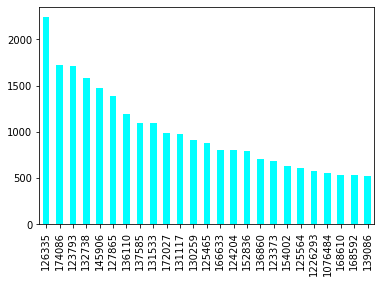

In [80]:
df.item_id.value_counts().head(25).plot(kind='bar', color = 'cyan')

From the chart above, we can see that the most popular item has been rented over 2200 times, more than 500 more times than the second and third most popular items. All of the 25 most popular items have been rented over 500 times. 

Similarly to the number of users who only rented a single item, I next wanted to look at how many items had been rented only once.

In [81]:
item_counts = df['item_id'].value_counts().to_frame()
print(len(item_counts[item_counts.item_id == 1]))
print(len(item_counts[item_counts.item_id == 1])/len(df))

341
0.0017710237659963437


In contrast to the number of users that only rented one item, the majority of items were reviewed more than once. Only 341 items were rented only a single time, which made up less than 0.2% of the total number of rentals.

Next, I wanted to look at whether items that had higher ratings were rented more often.

In [95]:
result = pd.DataFrame(df.groupby('item_id').size())
result['avg_rating'] =  df.groupby('item_id').rating.mean()

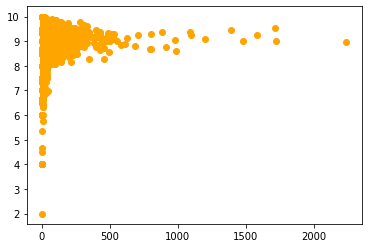

Overall Average Rating:  9.092371481123546


In [97]:
plt.scatter(x = result[0], y = result['avg_rating'], color = 'orange')
plt.show()
print("Overall Average Rating: ", np.mean(df['rating']))

While this chart shows no correlation between the number of reviews and average rating for the item, all items that had more than 500 reviews received and average rating greater than 8 out of 10. The ratings for the most popular items were slightly lower than some of the items with fewer ratings. The items with the lowest number of ratings had the widest range of values. The overall average of all ratings was around 9.

3. How often did the items rated fit? Did items that fit receive higher ratings?

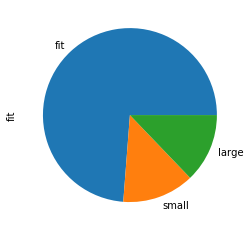

In [102]:
df['fit'].value_counts().plot(kind='pie')
plt.show()

From this chart, it is clear that the vast majority of customers (about three-quarters of item reviews) describe their item as fitting. About an eighth of reviews describe an item as being too small, and a similar proportion of reviews describe an item as being too large.

Next, I want to look at whether items that do not fit are rated lower than items fit.

In [113]:
fit_ratings = df.groupby('fit').rating.mean().to_frame()
fit_ratings

,rating
fit,
fit,9.308469
large,8.551942
small,8.419615


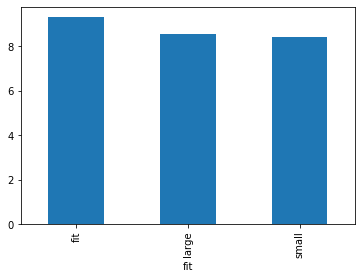

In [116]:
fit_ratings.plot(kind = 'bar', legend = False)
plt.show()

While items that were too large and items that were too small received similar ratings, items that did not fit received significantly lower ratings (0.8-0.9 points on average) than those that did.

## Further Research
One of the biggest issues when renting or purchasing clothing is determinining the correct size that you need. As shown above, items that did not fit receieved lower ratings than those that did. Further analysis of this data set could be used to help improve the size recommendation process. By using the available information about customer height, weight, and body type, RTR could predict whether certain items will fit the customer correctly. Additionally, by analyzing the feedback from the customer reviews, RTR can gain insight into why certain items did not fit the customer correctly and use that information to help refine their recommendation system.